In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90,high=90,size=1500)
lngs=np.random.uniform(low=-180,high=180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [5]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f186aa03fc9f35ac9338a77c0bfe069


In [7]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f186aa03fc9f35ac9338a77c0bfe069&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)

In [9]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 58.01,
  'feels_like': 51.37,
  'temp_min': 53.01,
  'temp_max': 63,
  'pressure': 1022,
  'humidity': 39},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 0},
 'clouds': {'all': 100},
 'dt': 1616616474,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1616582406,
  'sunset': 1616626836},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
boston_data.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [11]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat,lng,max_temp,humidity,clouds,wind)

42.3584 -71.0598 63 39 100 5.75


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-03-24 20:07:54'

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list.
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})

# If an error is experienced, skip the city.   
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | doctor pedro p. pena
City not found. Skipping...
Processing Record 7 of Set 1 | lasa
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | antigonish
Processing Record 11 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | kamaishi
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | karaul
City not found. Skipping...
Processing Record 16 of Set 1 | spornoye
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | burnie
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | jingdezhen

Processing Record 39 of Set 4 | saint-pierre
Processing Record 40 of Set 4 | doha
Processing Record 41 of Set 4 | malanje
Processing Record 42 of Set 4 | baykit
Processing Record 43 of Set 4 | hami
Processing Record 44 of Set 4 | termoli
Processing Record 45 of Set 4 | coahuayana
Processing Record 46 of Set 4 | port hardy
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | warqla
City not found. Skipping...
Processing Record 50 of Set 4 | labrea
Processing Record 1 of Set 5 | samusu
City not found. Skipping...
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | madang
Processing Record 4 of Set 5 | manzanillo
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | mayo
Processing Record 7 of Set 5 | lagoa
Processing Record 8 of Set 5 | charlestown
Processing Record 9 of Set 5 | narsaq
Processing Record 10 of Set 5 | port hedland
Processing Record 11 of Set 5 | penzance
Processing Record 12 of Set 

Processing Record 30 of Set 8 | shache
Processing Record 31 of Set 8 | aden
Processing Record 32 of Set 8 | wana
Processing Record 33 of Set 8 | presidencia roque saenz pena
Processing Record 34 of Set 8 | mount gambier
Processing Record 35 of Set 8 | shahrud
Processing Record 36 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 8 | sistranda
Processing Record 38 of Set 8 | chiang khong
Processing Record 39 of Set 8 | carlisle
Processing Record 40 of Set 8 | prince rupert
Processing Record 41 of Set 8 | ukiah
Processing Record 42 of Set 8 | morros
Processing Record 43 of Set 8 | cabo san lucas
Processing Record 44 of Set 8 | naze
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | gilgit
Processing Record 47 of Set 8 | vallenar
Processing Record 48 of Set 8 | falealupo
City not found. Skipping...
Processing Record 49 of Set 8 | sambava
Processing Record 50 of Set 8 | kumbhraj
Processing Record 1 of Set 9 | suntar
Processing Record 2 of Set 9

Processing Record 16 of Set 12 | karwar
Processing Record 17 of Set 12 | arona
Processing Record 18 of Set 12 | rawson
Processing Record 19 of Set 12 | brindisi
Processing Record 20 of Set 12 | kiruna
Processing Record 21 of Set 12 | acapulco
Processing Record 22 of Set 12 | daru
Processing Record 23 of Set 12 | casper
Processing Record 24 of Set 12 | atar
Processing Record 25 of Set 12 | college
Processing Record 26 of Set 12 | klaksvik
Processing Record 27 of Set 12 | lata
Processing Record 28 of Set 12 | saint-leu
Processing Record 29 of Set 12 | golden
Processing Record 30 of Set 12 | debre tabor
Processing Record 31 of Set 12 | kyle of lochalsh
City not found. Skipping...
Processing Record 32 of Set 12 | kemise
Processing Record 33 of Set 12 | san-pedro
Processing Record 34 of Set 12 | ilawa
Processing Record 35 of Set 12 | springbok
Processing Record 36 of Set 12 | ranong
Processing Record 37 of Set 12 | alekseyevka
Processing Record 38 of Set 12 | seddon
Processing Record 39 of 

In [14]:
len(city_data)

564

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.59,66,0,12.48,PF,2021-03-24 20:06:20
1,Qaanaaq,77.4840,-69.3632,-18.67,65,20,4.74,GL,2021-03-24 20:09:03
2,Nikolskoye,59.7035,30.7861,37.99,81,90,8.95,RU,2021-03-24 20:09:03
3,Mataura,-46.1927,168.8643,46.99,97,17,2.21,NZ,2021-03-24 20:09:04
4,Lasa,46.6166,10.7002,53.60,35,0,3.44,IT,2021-03-24 20:04:53
5,Butaritari,3.0707,172.7902,81.54,80,22,18.81,KI,2021-03-24 20:09:04
6,La Ronge,55.1001,-105.2842,23.00,58,100,14.97,CA,2021-03-24 20:09:04
7,Antigonish,45.6169,-61.9986,62.60,36,57,5.75,CA,2021-03-24 20:09:04
8,Ponta Do Sol,32.6667,-17.1000,60.01,66,100,1.99,PT,2021-03-24 20:09:05
9,Kamaishi,39.2667,141.8833,48.07,90,100,5.59,JP,2021-03-24 20:09:05


In [16]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-03-24 20:06:20,-23.1203,-134.9692,79.59,66,0,12.48
1,Qaanaaq,GL,2021-03-24 20:09:03,77.4840,-69.3632,-18.67,65,20,4.74
2,Nikolskoye,RU,2021-03-24 20:09:03,59.7035,30.7861,37.99,81,90,8.95
3,Mataura,NZ,2021-03-24 20:09:04,-46.1927,168.8643,46.99,97,17,2.21
4,Lasa,IT,2021-03-24 20:04:53,46.6166,10.7002,53.60,35,0,3.44
...,...,...,...,...,...,...,...,...,...
559,Sidi Ali,DZ,2021-03-24 20:11:02,36.0998,0.4206,53.44,55,0,1.81
560,Tazovskiy,RU,2021-03-24 20:11:03,67.4667,78.7000,7.88,99,86,6.76
561,Yarim,YE,2021-03-24 20:11:03,14.2980,44.3779,56.93,31,6,0.60
562,High Rock,BS,2021-03-24 20:11:03,26.6208,-78.2833,80.60,57,20,6.91


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/24/21'

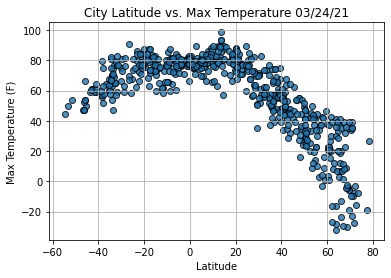

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

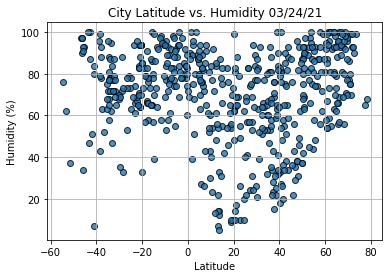

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + today)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

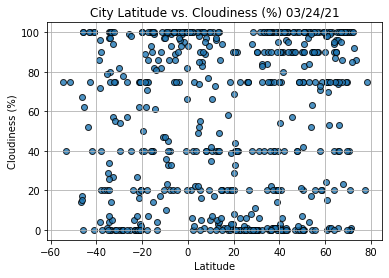

In [26]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

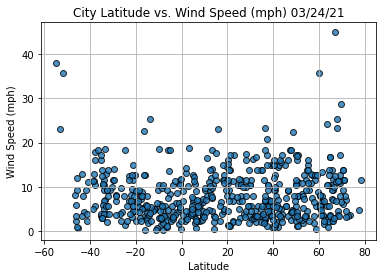

In [27]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [29]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [30]:
linregress(lats,temps)

LinregressResult(slope=-0.452929121241496, intercept=92.93922548147363, rvalue=-0.7590444753769936, pvalue=0.01089687086168761, stderr=0.13734880392044935)

In [31]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [33]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

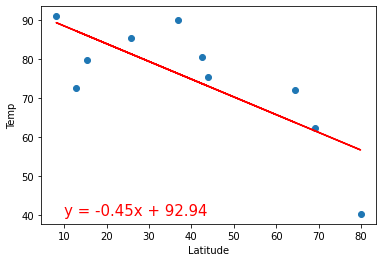

In [34]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()